<a href="https://colab.research.google.com/github/filizolalab/CADD2021/blob/main/Tutorial_Example_BSR3101_Davide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Example Tutorial for BRS3101) Molecule Featurization and Datasets

**What will we learn**

In this tutorial we introduce some key concepts regarding molecular datasets for applicaiton of machine learning to drug design and molecular modeling.
1. Different featurization techniques (description of molecular structures for ML)
2. Datasets, iterators, train/validation/test splitting

**What will we use**

We will use `deepchem` and `rdKit` within the [Google Colaboratory](https://colab.research.google.com/) framework. 
* Google Colaboratory is a cloud-based platform to run python code without the need to setup your local machine with a python environment. It allows you to write and execute Python in your browser, with zero configuration required, Free access to GPUs, Easy sharing. The code you develop and run in colab will run in any python environment.

* [`deepchem`](https://deepchem.io/) is a pyhton library that implements tools to create high quality, open source tools for drug discovery, materials science, quantum chemistry, and biology. 

* [`rdKit`](https://www.rdkit.org/) is a library of chemoinformatics 

## Install `deepchem` and `rdkit`

In [2]:
!pip install --pre deepchem
!pip install --pre rdkit-pypi 
!pip install --pre PubChemPy

     |████████████████████████████████| 609 kB 32.0 MB/s 
     |████████████████████████████████| 20.4 MB 1.4 MB/s 
  Created wheel for PubChemPy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13835 sha256=8b8113a4068f29bb23a5e7c6a8ec1db3a5cdf9f406a22a280c95d65dc7a1c92d
  Stored in directory: /root/.cache/pip/wheels/7c/3d/8c/8192697412e9899dc55bbbb08bbc1197bef333caaa2a71c448
Successfully built PubChemPy


In [3]:
import deepchem as dc
dc.__version__

'2.6.0.dev'

## Featurizers

Molecules can be represented in different ways.
* fingerprints (e.g. Circular Fingerprints, )
* molecular properties 
* Graph convolution models [Duvenaud et al.](https://arxiv.org/abs/1509.09292)
* Tokenizers

[list of featurizers](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6917215/)


### Fingerprints

In [4]:
from rdkit import Chem
smiles = ['C1=CC=CC=C1']

# Example 1: (size = 2048, radius = 4)
featurizer = dc.feat.CircularFingerprint(size=2048, radius=4)
features = featurizer.featurize(smiles)


In [5]:
features.shape

(1, 2048)

In [18]:
for i,fp in enumerate(features[0]): 
  if fp==1: print(i)

389
1088
1232
1873


### Molecular properties

In [6]:
smiles = ['CC(=O)OC1=CC=CC=C1C(=O)O']
featurizer = dc.feat.RDKitDescriptors()
features = featurizer.featurize(smiles)

In [7]:
features

array([[ 1.06119482e+01, -1.11402778e+00,  1.06119482e+01,
         1.60185185e-02,  5.50121797e-01,  1.80159000e+02,
         1.72095000e+02,  1.80042259e+02,  6.80000000e+01,
         0.00000000e+00,  3.39003787e-01, -4.77539527e-01,
         4.77539527e-01,  3.39003787e-01,  1.30769231e+00,
         1.92307692e+00,  2.46153846e+00,  1.65361112e+01,
         1.01822824e+01,  2.10430698e+00, -2.03113209e+00,
         2.16983456e+00, -2.06300006e+00,  5.91306580e+00,
        -1.31414342e-01,  3.04352735e+00,  3.43222868e+02,
         9.84493498e+00,  6.98135954e+00,  6.98135954e+00,
         6.10906091e+00,  3.61745365e+00,  3.61745365e+00,
         2.39495568e+00,  2.39495568e+00,  1.37115466e+00,
         1.37115466e+00,  8.87171219e-01,  8.87171219e-01,
        -1.84000000e+00,  2.03253692e+00,  9.24960573e+00,
         3.70925126e+00,  2.29741503e+00,  7.47570526e+01,
         9.84339035e+00,  1.13129633e+01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.19386106e+0

## Datasets
https://deepchem.readthedocs.io/en/latest/api_reference/moleculenet.html


## Load an example dataset (Delaney dataset of molecular solubilities)



The Delaney (ESOL) dataset a regression dataset containing structures and water solubility data for 1128 compounds. The dataset is widely used to validate machine learning models on estimating solubility directly from molecular structures (as encoded in SMILES strings).

The raw data csv file contains columns below:
* “Compound ID” - Name of the compound
* “smiles” - SMILES representation of the molecular structure
* “measured log solubility in mols per litre” - Log-scale water solubility of the compound, used as label

### the Dataset structure
Now let's consider the contents of the Dataset. Every Dataset stores a list of samples. Very roughly speaking, a sample is a single data point. In this case, each sample is a molecule. In other datasets a sample might correspond to an experimental assay, a cell line, an image, or many other things. For every sample the dataset stores the following information.

* The features, referred to as `X`. This is the input that should be fed into a model to represent the sample.
* The labels, referred to as `y`. This is the desired output from the model. During training, it tries to make the model's output for each sample as close as possible to y.
* The weights, referred to as `w`. This can be used to indicate that some data values are more important than others. In later tutorials we will see examples of how this is useful.
* An `ID`, which is a unique identifier for the sample. This can be anything as long as it is unique. Sometimes it is just an integer index, but in this dataset the ID is a SMILES string describing the molecule.


The final piece of information listed in the output is `task_names`. Some datasets contain multiple pieces of information for each sample. For example, if a sample represents a molecule, the dataset might record the results of several different experiments on that molecule. This dataset has only a single task: "measured log solubility in mols per litre". 


In [ ]:
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='GraphConv')

In [ ]:
train_dataset, valid_dataset, test_dataset = datasets

In [ ]:
train_dataset

<DiskDataset X.shape: (902,), y.shape: (902, 1), w.shape: (902, 1), ids: ['CC(C)=CCCC(C)=CC(=O)' 'CCCC=C' 'CCCCCCCCCCCCCC' ...
 'Nc2cccc3nc1ccccc1cc23 ' 'C1CCCCCC1' 'OC1CCCCCC1'], task_names: ['measured log solubility in mols per litre']>

## Prepare and featurize your own dataset


Here we will read a file containing smiles and labels and prepare a dataset for machine learning.

* read from local (see [here](https://colab.research.google.com/notebooks/io.ipynb) for colab file IO)


In [21]:
from google.colab import files
import csv
uploaded = files.upload()

Saving test1.csv to test1.csv


In [22]:

lines = [line.decode("utf-8") for line in uploaded['test1.csv'].splitlines()]
reader = csv.reader(lines)
molecules = list(reader)


In [23]:
IDs = [molecule[0] for molecule in molecules]
smiles = [molecule[1] for molecule in molecules]
label = [molecule[2] for molecule in molecules]

features = featurizer.featurize(smiles)
dataset = dc.data.NumpyDataset(X=features, y=label, ids=IDs)


In [ ]:
splitter = dc.splits.RandomSplitter()

train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(dataset)

In [ ]:
print(f'total {len(dataset)}')

print(f'train {len(train_dataset)}')
print(f'valid {len(valid_dataset)}')
print(f'test {len(test_dataset)}')



In [ ]:
train_dataset.X.shape

## Train a deep-learning model to predict 

In [ ]:
model = dc.models.MultitaskClassifier(n_tasks=1, n_features=2048, layer_sizes=[1000])

In [ ]:

model.fit(train_dataset, nb_epoch=10)
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)



In [ ]:
metric

In [ ]:
print('training set score:', model.evaluate(train_dataset, metric))
print('test set score:', model.evaluate(test_dataset, metric))

training set score: {'roc_auc_score': 1.0}
test set score: {'roc_auc_score': 0.8831168831168831}


Let us plot the results

[how to plot in Colab](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.02-Simple-Scatter-Plots.ipynb#scrollTo=RmV1JUqGGH0X)



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

xy = model.predict(test_dataset).reshape(32,2)

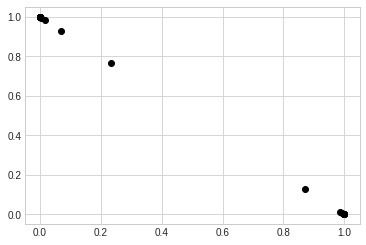

In [ ]:
plt.plot(xy[:,0], xy[:,1], 'o', color='black');


In [ ]:
xy

array([[6.98894113e-02, 9.30110574e-01],
       [9.99990344e-01, 9.67797132e-06],
       [4.94283764e-03, 9.95057225e-01],
       [9.87544656e-01, 1.24553293e-02],
       [1.77104288e-04, 9.99822915e-01],
       [9.99969602e-01, 3.03987927e-05],
       [4.97840694e-04, 9.99502182e-01],
       [9.99964952e-01, 3.50628216e-05],
       [2.18145644e-08, 1.00000000e+00],
       [6.41521910e-05, 9.99935865e-01],
       [9.99956727e-01, 4.32157176e-05],
       [6.56790799e-04, 9.99343216e-01],
       [5.36886000e-06, 9.99994636e-01],
       [2.16501761e-07, 9.99999762e-01],
       [1.08921423e-08, 1.00000000e+00],
       [2.37802139e-10, 1.00000000e+00],
       [1.00756751e-03, 9.98992383e-01],
       [1.23411309e-10, 1.00000000e+00],
       [1.06528175e-09, 1.00000000e+00],
       [4.91430634e-04, 9.99508619e-01],
       [2.34919488e-01, 7.65080512e-01],
       [7.06070132e-05, 9.99929428e-01],
       [2.89720483e-05, 9.99971032e-01],
       [1.18451804e-04, 9.99881506e-01],
       [9.999998

# Cluster ligands by similarity in rdKit

[examples of basic `rdkit` use](https://www.rdkit.org/docs/GettingStartedInPython.html)


In [19]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [20]:
# Define clustering setup
def cluster_fingerprints(fps,cutoff=0.2):
    from rdkit import DataStructs
    from rdkit.ML.Cluster import Butina

    # first generate the distance matrix:
    dists = []
    nfps = len(fps)
    for i in range(1,nfps):
        sims = DataStructs.BulkTanimotoSimilarity(fps[i],fps[:i])
        dists.extend([1-x for x in sims])

    # now cluster the data:
    cs = Butina.ClusterData(dists,nfps,cutoff,isDistData=True)
    return cs



In [29]:
featurizer = dc.feat.CircularFingerprint(size=2048, radius=4)
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer=featurizer)

In [32]:
datasets[0].X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [44]:
ms = [Chem.MolFromSmiles(x) for x in smiles]

In [33]:
fps = [AllChem.GetMorganFingerprintAsBitVect(x,4,2048) for x in ms]

In [37]:
clusters = cluster_fingerprints(fps,cutoff=0.4)

In [38]:
#show one of the clusters
print(clusters[0])



(108, 2, 4, 10, 13, 17, 22, 26, 46, 49, 53, 57, 59, 60, 62, 63, 69, 70, 71, 88, 92, 117, 118, 147, 150, 185)


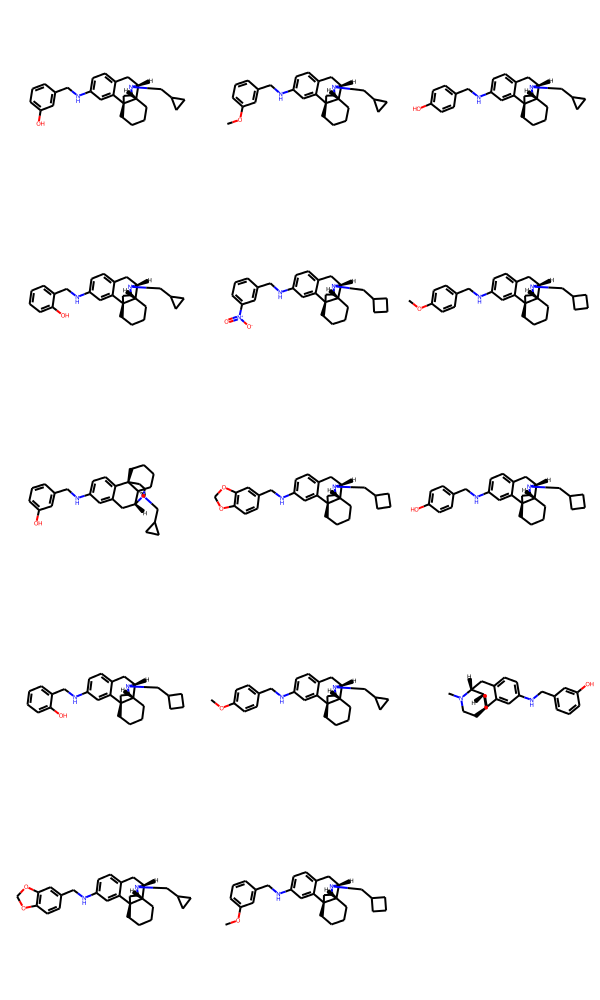

In [41]:
#now display structures from one of the clusters
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole


mols=[ms[i] for i in clusters[2]]
Draw.MolsToGridImage(mols)

In [42]:
from rdkit.Chem import Descriptors

In [48]:

[Descriptors.MolLogP(mol) for mol in ms]

[4.956800000000004,
 4.5667000000000035,
 10.255199999999997,
 8.086100000000009,
 6.744300000000008,
 6.260300000000007,
 -6.35918999999991,
 3.803300000000003,
 4.4013000000000035,
 6.913700000000008,
 4.263300000000004,
 4.1657000000000055,
 3.9197000000000046,
 10.255199999999997,
 4.685700000000004,
 4.294000000000004,
 3.8606000000000025,
 9.027000000000005,
 3.3264000000000022,
 2.7197000000000013,
 3.0954000000000015,
 3.3656000000000015,
 11.068499999999991,
 3.447600000000002,
 3.203000000000002,
 6.260300000000007,
 11.035399999999992,
 5.965900000000006,
 3.6890000000000027,
 3.0954000000000015,
 2.4887000000000006,
 5.040200000000005,
 4.3026000000000035,
 5.9854000000000065,
 1.7072999999999998,
 5.775700000000005,
 3.511500000000003,
 6.277500000000007,
 3.3567000000000027,
 3.2333000000000007,
 4.250700000000003,
 6.136600000000007,
 6.260300000000007,
 4.869700000000004,
 5.802740000000006,
 4.568300000000003,
 6.655900000000008,
 5.755100000000006,
 6.577320000000007,